### Scores Metadata Analysis

#### Importing the processed data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_meta = pd.read_csv('./data/processed/scores_metadata.csv')
df_scores = pd.read_csv('./data/processed/scores.csv')

#### General Overview

Let's check the scores metadata. We shall make an analysis of this dataset first.  
The only numeric variable of interest here is the column `seconds`, which shows the duration of each composition.  
We can make some aggregations to look for patterns.

*Later, we will combine this dataset with the scores dataset. Particularly, we are interested in having the column `tonic_encoded` from the scores metadata together with the `notes` column in the scores data, so we can calculate the difference between the root (tonic) and each note, thus, getting what musical degrees are used with each note in a chromatic scale. From there, we might get which scales and scale degrees are used.*

In [3]:
df_meta.head(5)

,id,composer,composition,movement,ensemble,seconds,key,tonic,tonic_encoded
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,447,A major,A,9
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,251,A major,A,9
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,444,A major,A,9
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,368,A major,A,9
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,546,A major,A,9


In [4]:
df_meta.shape

(318, 9)

In [5]:
df_meta.dtypes

id                int64
composer         object
composition      object
movement         object
ensemble         object
seconds           int64
key              object
tonic            object
tonic_encoded     int64
dtype: object

In [6]:
# Changing type to column `tonic_encoded`
df_meta.tonic_encoded.astype("int64")

0       9
1       9
2       9
3       9
4       9
       ..
313     7
314     7
315    11
316     4
317     7
Name: tonic_encoded, Length: 318, dtype: int64

In [7]:
# Checking duplicated rows
df_meta.duplicated().value_counts()

False    318
dtype: int64

In [8]:
# Checking for NaN values
df_meta.isna().any()

id               False
composer         False
composition      False
movement         False
ensemble         False
seconds          False
key              False
tonic            False
tonic_encoded    False
dtype: bool

In [9]:
# Numeric variables summary
df_meta.describe()

,id,seconds,tonic_encoded
count,318.000000,318.000000,318.000000
mean,2257.685535,376.553459,5.166667
std,269.504116,197.580400,3.339925
min,1727.000000,55.000000,0.000000
25%,2118.250000,227.000000,3.000000
50%,2309.000000,356.500000,5.000000
75%,2481.750000,481.500000,9.000000
max,2678.000000,1069.000000,11.000000


Here we have that the shortest composition is 55 seconds. The longest one is 1069 seconds (17 min 49 sec). Average of 377 seconds (6 min 17 sec).  
Let's see what are the shortest and longest ones.

In [10]:
df_meta[df_meta['seconds']==df_meta['seconds'].min()]

,id,composer,composition,movement,ensemble,seconds,key,tonic,tonic_encoded
159,2310,Bach,"WTK I, No. 15: Prelude and Fugue in G major",1. Prelude,Solo Piano,55,G major,G,7


In [11]:
df_meta[df_meta['seconds']==df_meta['seconds'].max()]

,id,composer,composition,movement,ensemble,seconds,key,tonic,tonic_encoded
162,2315,Beethoven,String Quartet No 15 in A minor,3. Molto Adagio; Andante,String Quartet,1069,A minor,A,9


#### Univariable analsysis

We start by plotting a histogram of the `seconds` column, which shows the duration of each piece.  
Then, we will do some countings, to see which composers have more compositions in this dataset, most popular keys, and most popular ensembles.

<AxesSubplot:>

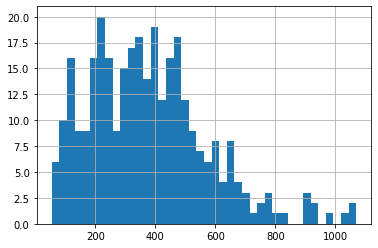

In [12]:
# Histogram of durations
df_meta.seconds.hist(bins=40)

In [13]:
# Who are the composers and how many pieces they have in this dataset?
df_meta.composer.value_counts()

Beethoven    157
Bach          55
Schubert      30
Brahms        24
Mozart        24
Cambini        9
Dvorak         8
Faure          4
Ravel          4
Haydn          3
Name: composer, dtype: int64

Beethoven    49.371069
Bach         17.295597
Schubert      9.433962
Brahms        7.547170
Mozart        7.547170
Cambini       2.830189
Dvorak        2.515723
Faure         1.257862
Ravel         1.257862
Haydn         0.943396
Name: composer, dtype: float64


<AxesSubplot:ylabel='composer'>

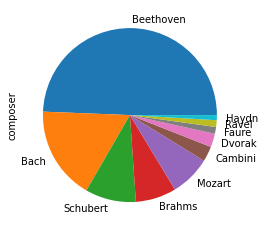

In [14]:
# What's the ratio of the number of compositions of each composer compared against the total?
print(df_meta.composer.value_counts(normalize=True)*100)

# Pie chart showing these ratios
df_meta.composer.value_counts().plot(kind='pie')

Lots of Beethoven comopositions in the dataset (almost a half). Bach also holds it's share.

In [15]:
# What are the most common keys?
df_meta.key.value_counts()

E-flat major     42
A major          30
B-flat major     24
G major          24
C minor          21
F major          19
A minor          17
D major          17
G minor          16
C major          16
F minor          15
D minor          13
E major          12
E minor          10
A-flat major      9
B minor           7
C-sharp minor     7
F                 4
D-flat major      3
F-sharp major     2
F-sharp minor     2
C-sharp major     2
B major           2
G-sharp minor     2
B-flat minor      1
E-flat minor      1
Name: key, dtype: int64

E-flat major     13.207547
A major           9.433962
B-flat major      7.547170
G major           7.547170
C minor           6.603774
F major           5.974843
A minor           5.345912
D major           5.345912
G minor           5.031447
C major           5.031447
F minor           4.716981
D minor           4.088050
E major           3.773585
E minor           3.144654
A-flat major      2.830189
B minor           2.201258
C-sharp minor     2.201258
F                 1.257862
D-flat major      0.943396
F-sharp major     0.628931
F-sharp minor     0.628931
C-sharp major     0.628931
B major           0.628931
G-sharp minor     0.628931
B-flat minor      0.314465
E-flat minor      0.314465
Name: key, dtype: float64


<AxesSubplot:>

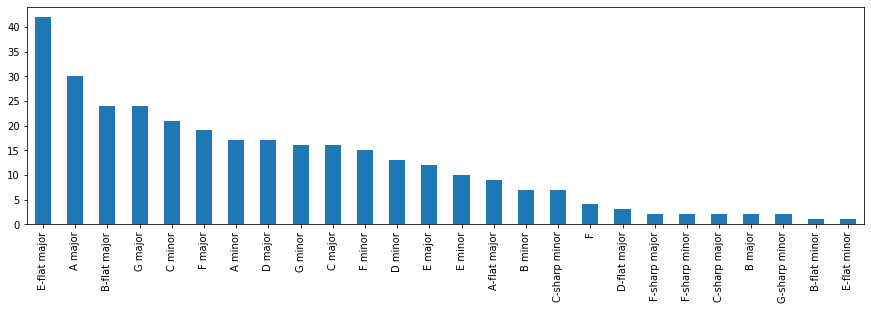

In [16]:
# Now the ratio for each key
print(df_meta.key.value_counts(normalize=True)*100)

# Bar chart for keys
df_meta.key.value_counts().plot(kind='bar', figsize=(15,4))

E-flat major seems to be a pretty popular key. I wonder why is this.

In [17]:
# What are the most common ensembles?
df_meta.ensemble.value_counts()

Solo Piano                     156
String Quartet                  57
Accompanied Violin              22
Solo Violin                      9
Wind Quintet                     9
Piano Quartet                    8
Accompanied Cello                7
Piano Trio                       7
Pairs Clarinet-Horn-Bassoon      6
String Sextet                    5
Accompanied Clarinet             4
Piano Quintet                    4
Wind Octet                       4
Horn Piano Trio                  4
Violin and Harpsichord           4
Clarinet-Cello-Piano Trio        3
Clarinet Quintet                 3
Solo Flute                       3
Wind and Strings Octet           2
Viola Quintet                    1
Name: ensemble, dtype: int64

Solo Piano            49.056604
String Quartet        17.924528
Accompanied Violin     6.918239
Solo Violin            2.830189
Wind Quintet           2.830189
Piano Quartet          2.515723
Name: ensemble, dtype: float64


<AxesSubplot:ylabel='ensemble'>

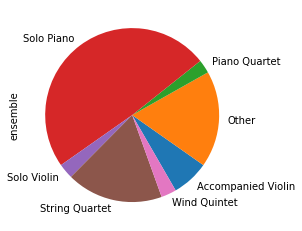

In [18]:
# Now the ratio for each ensemble (showing only top 6 ensembles)
print(df_meta.ensemble.value_counts(normalize = True).head(6)*100)


# Pie chart showing these ratios

s=df_meta.ensemble.value_counts() # Series with the count for each category

# Using the combination of groupby() (with np.where for condition) and sum() to create the category 'Others'
s.groupby(np.where(s>=8,s.index,'Other')).sum().plot(kind='pie',startangle=-60)


Once again one category has almost half of the dataset. In this case, Solo Piano compositions. This might be related to the fact that almost a half of the composition are Beethoven's.

#### Multivariable analsysis


The only numeric variable of interest we have is the duration of the composition in the column `seconds`, so we will analyze it by categorical variables such as `composer`, `ensemble`, and `key`.  
We will also look for patterns between these categorical variables.


In [19]:
# Mean of duration by composer
df_meta.groupby(['composer'])['seconds'].mean().sort_values(ascending=False)

composer
Schubert     506.266667
Faure        490.750000
Brahms       480.458333
Dvorak       417.875000
Beethoven    414.961783
Ravel        410.750000
Mozart       391.083333
Haydn        296.000000
Cambini      286.333333
Bach         146.836364
Name: seconds, dtype: float64

Catches my attention how short are Bach's compositions (average of 147 seconds), being the second most prolific composer within this dataset.

In [20]:
# Mean of duration by ensemble
df_meta.groupby(['ensemble'])['seconds'].mean().sort_values(ascending=False)

ensemble
Viola Quintet                  924.000000
String Sextet                  570.800000
Piano Quartet                  549.125000
Accompanied Cello              536.142857
Clarinet Quintet               515.333333
Clarinet-Cello-Piano Trio      494.333333
Horn Piano Trio                447.750000
String Quartet                 426.333333
Accompanied Violin             402.863636
Wind and Strings Octet         396.000000
Piano Trio                     390.285714
Piano Quintet                  377.500000
Solo Piano                     352.807692
Wind Octet                     338.250000
Accompanied Clarinet           300.500000
Wind Quintet                   286.333333
Violin and Harpsichord         239.250000
Pairs Clarinet-Horn-Bassoon    237.833333
Solo Violin                    197.666667
Solo Flute                     156.333333
Name: seconds, dtype: float64

In [21]:
# Creating series grouped by composer and ansemble, showing mean duration of compositions
s_ce_duration = df_meta.groupby(['composer', 'ensemble'])['seconds'].mean().round(1)

# Creating series with number of compositions with the same grouping
s_ce_count = df_meta.groupby(['composer', 'ensemble']).size().rename("counts")


In [22]:
# Joining both series to create a dataframe, sorted by counts and mean duration
df_ce = pd.concat([s_ce_duration, s_ce_count], join='inner', axis=1).sort_values(["seconds","counts"],ascending=[False, True]).reset_index()

# Top 10
df_ce.head(10)

,composer,ensemble,seconds,counts
0,Schubert,Viola Quintet,924.0,1
1,Brahms,Piano Quartet,607.5,4
2,Brahms,String Sextet,570.8,5
3,Brahms,Accompanied Cello,550.7,3
4,Beethoven,Accompanied Cello,525.2,4
5,Mozart,Clarinet Quintet,515.3,3
6,Schubert,Solo Piano,511.0,24
7,Beethoven,Clarinet-Cello-Piano Trio,494.3,3
8,Faure,Piano Quartet,490.8,4
9,Schubert,Piano Trio,490.0,1


In [23]:
# Bottom 10
df_ce.tail(10)

,composer,ensemble,seconds,counts
21,Beethoven,Wind Octet,338.2,4
22,Brahms,Accompanied Clarinet,300.5,4
23,Haydn,String Quartet,296.0,3
24,Cambini,Wind Quintet,286.3,9
25,Mozart,Pairs Clarinet-Horn-Bassoon,278.0,3
26,Bach,Violin and Harpsichord,239.2,4
27,Beethoven,Pairs Clarinet-Horn-Bassoon,197.7,3
28,Bach,Solo Violin,197.7,9
29,Bach,Solo Flute,156.3,3
30,Bach,Solo Piano,124.9,39


The combionation of composer and ensemble with the longest mean duration is Schubert with a Viola Quintet. Although, there's only one composition that fits this, so it doesn't say much. It's followed by Brahms with different ensembles.    
At the other end, we have Bach. Shortest mean duration with different ensembles: Solo Violin, Solo Flute, Solo Piano. Pretty solo guy.

In [24]:
# Only Bach's ensembles
df_ce[df_ce['composer']=='Bach'][['composer','ensemble']]

,composer,ensemble
26,Bach,Violin and Harpsichord
28,Bach,Solo Violin
29,Bach,Solo Flute
30,Bach,Solo Piano


Pretty solo guy, indeed.  
We will analyze the dataset by composer soon.  

First, let's see if there are popular combinations of ensembles and keys.

In [25]:
# Grouping by ensemble and key, and counting the compositions
df_composer_key = df_meta.groupby(['ensemble', 'key']).size().reset_index(name='counts')

In [26]:
# Top 20 combinations of ensemble and key
df_composer_key.sort_values('counts',ascending=False).reset_index(drop=True).iloc[0:20]

,ensemble,key,counts
0,Solo Piano,C minor,15
1,Solo Piano,E-flat major,15
2,Solo Piano,A major,12
3,Solo Piano,D major,11
4,String Quartet,F major,10
5,Accompanied Violin,G major,9
6,Solo Piano,B-flat major,9
7,Solo Piano,A-flat major,9
8,Solo Piano,F minor,9
9,Solo Piano,D minor,8


Mostly Solo Piano compositions, as they're the most popular. Maybe we should check combinations of ensemble and keys for the most popular ensembles separately. We shall do that.

#### Analysis by ensemble

We will create dataframes of the compositions with the most repeated ensembles.

In [27]:
# "Solo Piano" compositions
df_solopiano = df_meta[df_meta['ensemble']=='Solo Piano']

# "String Quartet" compositions
df_strquartet = df_meta[df_meta['ensemble']=='String Quartet']

# "Accompanied Violin" compositions
df_accviolin = df_meta[df_meta['ensemble']=='Accompanied Violin']

Let's dig in the **Solo Piano** compositions first.

Beethoven    93
Bach         39
Schubert     24
Name: composer, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


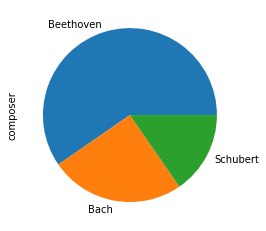

In [28]:
# Solo Piano count of compositions by composer
print(df_solopiano.composer.value_counts())
print(df_solopiano.composer.value_counts().plot(kind='pie'))

Beethoven dominates in amount of piano compositions in this dataset

In [29]:
# Average duration by composer in Solo Piano ensembles
df_solopiano.groupby('composer')['seconds'].mean()

composer
Bach         124.897436
Beethoven    407.559140
Schubert     511.000000
Name: seconds, dtype: float64

In [30]:
# Most popular keys in Solo Piano
df_solopiano.groupby('key').size().sort_values(ascending=False).head(10)

key
C minor         15
E-flat major    15
A major         12
D major         11
A-flat major     9
B-flat major     9
F minor          9
G major          8
C major          8
D minor          8
dtype: int64

I thought C major would be on top for this one. I was wrong.  

Ok, now let's check **String Quartet** compositions.


Beethoven    28
Mozart       12
Dvorak        8
Ravel         4
Haydn         3
Brahms        2
Name: composer, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


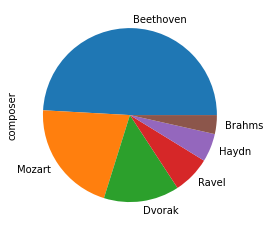

In [31]:
# String Quartet count of compositions by composer
print(df_strquartet.composer.value_counts())
print(df_strquartet.composer.value_counts().plot(kind='pie'))

Once again, our friend Beethoven being the most prolific composer. This time for String Quartet compositions.

In [32]:
# Average duration by composer on String Quartet ensembles
df_strquartet.groupby('composer')['seconds'].mean()

composer
Beethoven    459.035714
Brahms       405.000000
Dvorak       417.875000
Haydn        296.000000
Mozart       397.000000
Ravel        410.750000
Name: seconds, dtype: float64

In [33]:
# Most popular keys in String Quartet ensembles
df_strquartet.groupby('key').size().sort_values(ascending=False).head(10)

key
F major         10
E-flat major     8
C major          6
A major          5
B-flat major     5
F                4
G major          4
A minor          3
D major          3
E minor          3
dtype: int64

Let's repeat this analysis again for **Accompanied Violin** ensembles.

Beethoven    22
Name: composer, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


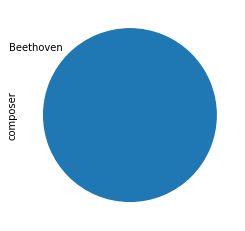

In [34]:
# Accompanied Violin count of compositions by composer
print(df_accviolin.composer.value_counts())
print(df_accviolin.composer.value_counts().plot(kind='pie', startangle=-45))

Oh, that was the next step. Being the only one with compositions in an ensemble category.

In [35]:
# Average duration by composer on Accompanied Violin ensembles
df_accviolin.groupby('composer')['seconds'].mean()

composer
Beethoven    402.863636
Name: seconds, dtype: float64

In [36]:
# Most popular keys in Accompanied Violin ensembles
df_accviolin.groupby('key').size().sort_values(ascending=False).head(10)

key
G major         9
C minor         4
A major         3
A minor         3
E-flat major    2
D major         1
dtype: int64

#### Analysis by composer

As before, we will create dataframes for the composers with more compositions in the dataset.

In [37]:
# Beethoven's compositions
df_bet = df_meta[df_meta['composer']=='Beethoven']

# Bach's compositions
df_bach = df_meta[df_meta['composer']=='Bach']

# Schubert's compositions
df_schubert = df_meta[df_meta['composer']=='Schubert']

# Mozart's compositions
df_mozart = df_meta[df_meta['composer']=='Mozart']

We shall star with our star guest, **Beethoven**.

In [38]:
# Most used keys for Beethoven
df_bet.key.value_counts()

E-flat major     28
G major          18
A major          17
C minor          13
F major          11
B-flat major     11
C major           8
F minor           7
D major           7
E major           6
A-flat major      6
D minor           6
A minor           6
C-sharp minor     5
E minor           5
G minor           2
F-sharp major     1
Name: key, dtype: int64

E-flat major seems to be Beethoven's favorite key.  
Lot's of compositions in major keys, that's interesting. Let's do a count of compositions in major and minor keys. To do that, I'll add a column to the dataframes.  
I probably should go back to the beginning and add the column, so I don't have to do it for every composer at this point. I'll stick to the second (and worst) option for now.

In [39]:
# Creating column to identify the mode of the key, i.e. if it's major or minor
df_bet['mode'] = df_bet['key'].str.split().str[-1]

# Count of the modes used by Beethoven
df_bet['mode'].value_counts()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


major    113
minor     44
Name: mode, dtype: int64

Yep, that's a lot of major keys.

In [40]:
# Average duration by key mode
df_bet.groupby('mode')['seconds'].mean()

mode
major    400.522124
minor    452.045455
Name: seconds, dtype: float64

In [41]:
# Beethoven's mean duration by key
df_bet.groupby('key')['seconds'].mean().sort_values(ascending=False)

key
A minor          555.500000
E minor          509.400000
C minor          497.153846
B-flat major     493.181818
A major          481.705882
D minor          434.500000
D major          403.428571
C major          391.125000
E-flat major     382.892857
C-sharp minor    375.800000
A-flat major     373.166667
G major          363.722222
F major          362.818182
F minor          361.000000
E major          335.666667
G minor          267.000000
F-sharp major    180.000000
Name: seconds, dtype: float64

In [42]:
# Most used ensembles for Beethoven
df_bet.ensemble.value_counts()

Solo Piano                     93
String Quartet                 28
Accompanied Violin             22
Wind Octet                      4
Accompanied Cello               4
Clarinet-Cello-Piano Trio       3
Pairs Clarinet-Horn-Bassoon     3
Name: ensemble, dtype: int64

In [43]:
# Beethoven's mean duration by ensemble
df_bet.groupby('ensemble')['seconds'].mean()

ensemble
Accompanied Cello              525.250000
Accompanied Violin             402.863636
Clarinet-Cello-Piano Trio      494.333333
Pairs Clarinet-Horn-Bassoon    197.666667
Solo Piano                     407.559140
String Quartet                 459.035714
Wind Octet                     338.250000
Name: seconds, dtype: float64

Well, I think it's safe to say that **Beethoven** preferred major keys (mostly **E-flat major**) and **Solo Piano** pieces, apparently.  

Let's check now **Bach's** compositions.

In [44]:
# Most used keys for Bach
df_bach.key.value_counts()

B minor          7
G minor          6
A minor          5
E major          4
G-sharp minor    2
C-sharp major    2
F-sharp minor    2
B major          2
E minor          2
F minor          2
C minor          2
E-flat major     2
C-sharp minor    2
D minor          2
B-flat major     2
D major          2
A-flat major     2
C major          1
B-flat minor     1
A major          1
E-flat minor     1
G major          1
F-sharp major    1
F major          1
Name: key, dtype: int64

Lots of compositions in minor keys. Let's check.

In [45]:
# Creating column to identify the mode of the key, i.e. if it's major or minor
df_bach['mode'] = df_bach['key'].str.split().str[-1]

# Count of the modes used by Bach
df_bach['mode'].value_counts()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


minor    34
major    21
Name: mode, dtype: int64

Yep, more minor keys this time.

In [46]:
# Average duration by key mode
df_bach.groupby('mode')['seconds'].mean()

mode
major    107.238095
minor    171.294118
Name: seconds, dtype: float64

In [47]:
# Bach's mean duration by key
df_bach.groupby('key')['seconds'].mean().sort_values(ascending=False)

key
E-flat minor     238.000000
B minor          208.428571
F minor          205.000000
G minor          201.333333
B-flat minor     197.000000
C-sharp minor    169.000000
E-flat major     160.500000
A minor          159.400000
F-sharp minor    130.500000
G-sharp minor    129.000000
E major          125.250000
C major          116.000000
C-sharp major    115.000000
D minor          113.500000
C minor          111.000000
A-flat major     106.000000
E minor          104.500000
D major          100.000000
F-sharp major    100.000000
B-flat major      96.500000
A major           91.000000
B major           84.500000
F major           64.000000
G major           55.000000
Name: seconds, dtype: float64

In [48]:
# Most used ensembles for Bach
df_bach.ensemble.value_counts()

Solo Piano                39
Solo Violin                9
Violin and Harpsichord     4
Solo Flute                 3
Name: ensemble, dtype: int64

In [49]:
# Bach's mean duration by ensemble
df_bach.groupby('ensemble')['seconds'].mean()

ensemble
Solo Flute                156.333333
Solo Piano                124.897436
Solo Violin               197.666667
Violin and Harpsichord    239.250000
Name: seconds, dtype: float64

**Bach** also preferred **Solo Piano** compositions. The most notable difference with Beethoven is that most of Bach's compositions are in **minor keys**.  
Let's go with Schubert now

In [50]:
# Most used keys for Schubert
df_schubert.key.value_counts()

A major         8
A minor         6
C minor         4
D major         3
D-flat major    3
F minor         2
B-flat major    2
A-flat major    1
C major         1
Name: key, dtype: int64

In [51]:
# Creating column to identify the mode of the key, i.e. if it's major or minor
df_schubert['mode'] = df_schubert['key'].str.split().str[-1]

# Count of the modes used by Bach
df_schubert['mode'].value_counts()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


major    18
minor    12
Name: mode, dtype: int64

More major keys in this one. Not a vast difference, though.

In [52]:
# Average duration by key mode
df_schubert.groupby('mode')['seconds'].mean()

mode
major    512.055556
minor    497.583333
Name: seconds, dtype: float64

In [53]:
# Schubert's mean duration by key
df_schubert.groupby('key')['seconds'].mean().sort_values(ascending=False)

key
C major         924.000000
D major         644.333333
B-flat major    583.000000
F minor         513.500000
C minor         506.750000
A minor         486.166667
D-flat major    457.000000
A-flat major    438.000000
A major         423.125000
Name: seconds, dtype: float64

In [54]:
# Most used ensembles for Schubert
df_schubert.ensemble.value_counts()

Solo Piano       24
Piano Quintet     4
Viola Quintet     1
Piano Trio        1
Name: ensemble, dtype: int64

Oh, another Solo Piano advocate. Cool.

In [55]:
# Schubert's mean duration by ensemble
df_schubert.groupby('ensemble')['seconds'].mean()

ensemble
Piano Quintet    377.5
Piano Trio       490.0
Solo Piano       511.0
Viola Quintet    924.0
Name: seconds, dtype: float64

The mean duration by ensemble didn't really shed light to the analysis of any of these 4 chosen composers.  
There's not much to say about Schubert really. Another **Solo Piano** kind of guy who prefers **major keys**, though there are some compositions in minor keys, too.  

For my final act in this notebook, let's check **Mozart**.

In [56]:
# Most used keys for Mozart
df_mozart.key.value_counts()

C major         6
A major         4
G major         4
E-flat major    3
D minor         2
E major         2
B-flat major    2
F major         1
Name: key, dtype: int64

In [57]:
# Creating column to identify the mode of the key, i.e. if it's major or minor
df_mozart['mode'] = df_mozart['key'].str.split().str[-1]

# Count of the modes used by Bach
df_mozart['mode'].value_counts()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


major    22
minor     2
Name: mode, dtype: int64

Almost all major, wow.

In [58]:
# Average duration by key mode
df_mozart.groupby('mode')['seconds'].mean()

mode
major    394.272727
minor    356.000000
Name: seconds, dtype: float64

In [59]:
# Mozart's mean duration by key
df_mozart.groupby('key')['seconds'].mean().sort_values(ascending=False)

key
A major         484.500000
B-flat major    437.500000
C major         437.333333
G major         370.250000
D minor         356.000000
E major         343.000000
E-flat major    278.000000
F major         236.000000
Name: seconds, dtype: float64

In [60]:
# Most used ensembles for Mozart
df_mozart.ensemble.value_counts()

String Quartet                 12
Piano Trio                      6
Clarinet Quintet                3
Pairs Clarinet-Horn-Bassoon     3
Name: ensemble, dtype: int64

Good to see someone who has a different taste in ensembles. Although I'm not an expert, **String Quartet** seems fine for Mozart.

In [61]:
# Mozart's mean duration by ensemble
df_mozart.groupby('ensemble')['seconds'].mean()

ensemble
Clarinet Quintet               515.333333
Pairs Clarinet-Horn-Bassoon    278.000000
Piano Trio                     373.666667
String Quartet                 397.000000
Name: seconds, dtype: float64

Ok, this Mozart guy is an strings advocate, more precisely, **String Quartets**, and almost all of his compositions within this dataset are in **major keys**.  
The major and minor keys might be something generational. I googled quickly the 4 composers analyzed and the 3 that have more major than minor keys are 18th-19th century composers. Bach, being the only one with more minor keys, is from the 17th-18th century.

##### Final conclusion on the metadata?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=177ea176-1f94-4265-9666-0cca06278d8e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>